In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/Housing.csv'
housing_data = pd.read_csv(file_path)

In [ ]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_data = one_hot_encoder.fit_transform(housing_data[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
housing_data_encoded = pd.concat([housing_data.drop(columns=categorical_columns), encoded_categorical_df], axis=1)

In [ ]:
X = housing_data_encoded.drop(columns='price')
y = housing_data_encoded['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) score: {r2}")

Mean Squared Error (MSE): 1754318687330.6643
R-squared (R²) score: 0.6529242642153184


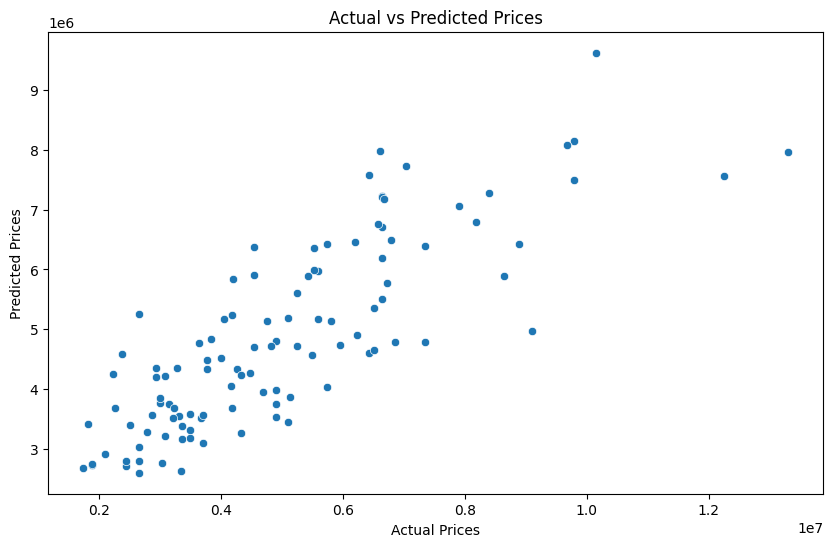

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

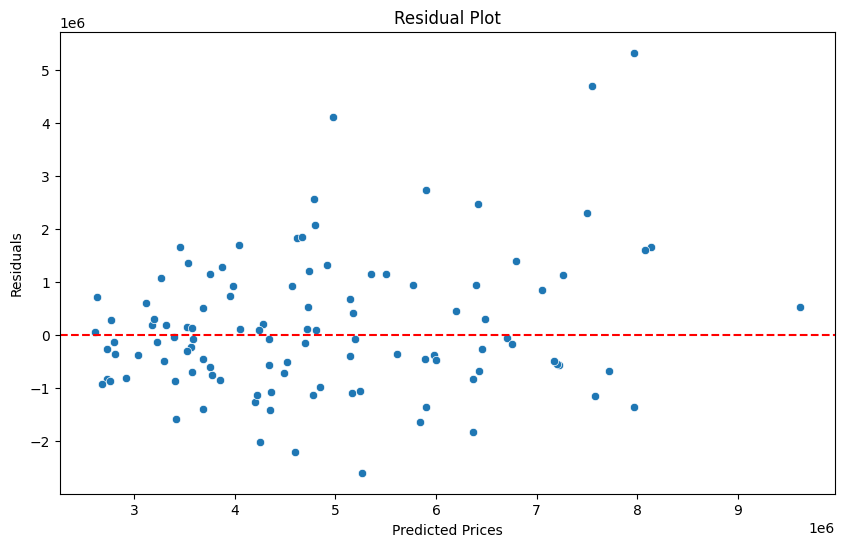

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()